In [0]:
### Plant - Bread Classification

The case study is from a dataset from Kaggle. 

Link to the Kaggle project site:

https://www.kaggle.com/c/plant-seedlings-classification

 The dataset has to be downloaded from the above Kaggle web site.

 Can you differentiate a weed from a crop seedling?

The ability to do so effectively can mean better crop yields and better stewardship of the environment.

The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of approximately 960 unique plants belonging to 12 species at several growth stages.

 

The points distribution for this case is as follows:

1. Read the images and generate the train and test dataset (5 points)
2. Divide the data set into Train and validation data sets
3. Initialize & build the model (10 points)
4. Optimize the model (8 points)
5. Predict the accuracy for both train and validation data (7 points)

**Reading the images and generating the train and test dataset**

In [0]:
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/Computer Vision with CNN')

**Unzip the Folders to get the train and test data**

In [0]:
from zipfile import ZipFile

with ZipFile('plant-seedlings-classification.zip', 'r') as z:
  z.extractall()


In [0]:
from zipfile import ZipFile

with ZipFile('train.zip', 'r') as z:
  z.extractall()

In [0]:
from zipfile import ZipFile
with ZipFile('test.zip', 'r') as z:
  z.extractall()

# New Section

In [0]:
import os
os.chdir('/content/drive/My Drive/Computer Vision with CNN/train')

In [20]:
ls

 Black-grass/        'Common wheat'/      'Scentless Mayweed'/
 Charlock/           'Fat Hen'/           'Shepherds Purse'/
 Cleavers/           'Loose Silky-bent'/  'Small-flowered Cranesbill'/
'Common Chickweed'/   Maize/              'Sugar beet'/


***Change the Directory pointer to the Train Folder and reading the data ***

In [0]:
x_train = []
y_train = []

In [0]:
os.listdir()

['Fat Hen',
 'Small-flowered Cranesbill',
 'Cleavers',
 'Black-grass',
 'Sugar beet',
 'Shepherds Purse',
 'Charlock',
 'Loose Silky-bent',
 'Scentless Mayweed',
 'Maize',
 'Common Chickweed',
 'Common wheat']

This indicates the directory has subfolders in it. so, we need to traverse through the directories and read the files.

In [26]:
x_train = []
y_train = []
import cv2
for i in os.listdir():
    print(i)
    if (os.path.isdir(i)):
            for j in os.listdir(i):
                try:
                    dummy = cv2.imread('/content/drive/My Drive/Computer Vision with CNN/train/' + i + "/" + j)
                    dummy = cv2.resize(dummy,(128,128))
                    x_train.append(dummy)
                    y_train.append(i)
                except Exception as e:
                    print(e)


Fat Hen
Small-flowered Cranesbill
Cleavers
Black-grass
Sugar beet
Shepherds Purse
Charlock
Loose Silky-bent
Scentless Mayweed
Maize
Common Chickweed
Common wheat


In [27]:
x_train[0]


array([[[ 95, 110, 118],
        [103, 119, 126],
        [ 85,  92, 112],
        ...,
        [ 92, 111, 118],
        [105, 126, 137],
        [ 99, 119, 131]],

       [[ 60,  68,  87],
        [ 83,  97, 109],
        [ 69,  80, 103],
        ...,
        [ 94, 110, 120],
        [106, 125, 137],
        [ 89, 114, 128]],

       [[ 63,  75,  89],
        [ 68,  85,  99],
        [ 53,  71,  91],
        ...,
        [ 98, 111, 123],
        [112, 130, 141],
        [ 96, 119, 132]],

       ...,

       [[ 56,  56,  63],
        [ 49,  47,  56],
        [ 61,  58,  66],
        ...,
        [ 52,  50,  60],
        [ 37,  35,  43],
        [ 40,  41,  46]],

       [[ 51,  53,  62],
        [ 49,  48,  57],
        [ 60,  56,  66],
        ...,
        [ 50,  48,  60],
        [ 40,  40,  48],
        [ 43,  43,  49]],

       [[ 56,  57,  62],
        [ 38,  38,  46],
        [ 53,  50,  60],
        ...,
        [ 50,  48,  55],
        [ 43,  43,  49],
        [ 48,  47,  56]]

In [28]:
y_train

['Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fa

In [0]:
import pandas as pd
dum = pd.get_dummies(y_train)


In [30]:
encoded_labels = dum
y_train = dum
y_train.head()

,Black-grass,Charlock,Cleavers,Common Chickweed,Common wheat,Fat Hen,Loose Silky-bent,Maize,Scentless Mayweed,Shepherds Purse,Small-flowered Cranesbill,Sugar beet
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0


In [31]:
y_train.shape

(4750, 12)

In [32]:
import numpy as np
y_train = np.array(y_train)
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [0]:
x_train = np.array(x_train)

In [34]:
x_train[0].shape

(128, 128, 3)

In [0]:
# Now read and transform the x_test data.

In [38]:
x_test=[]

os.chdir('/content/drive/My Drive/Computer Vision with CNN/test')
import cv2
for i in os.listdir():
    print(i)
    if (os.path.isdir(i)):
      for j in os.listdir(i):
          try:
              dummy = cv2.imread('/content/drive/My Drive/Computer Vision with CNN/test/' + i + "/" + j)
              dummy = cv2.resize(dummy,(128,128))
              x_test.append(dummy)
              #y_test.append(i)
          except Exception as e:
              print(e)
    elif (os.path.isfile(i)):
      try:
        dummy = cv2.imread('/content/drive/My Drive/Computer Vision with CNN/test/' + "/" + i)
        dummy = cv2.resize(dummy,(128,128))
        x_test.append(dummy)
        #y_test.append(i)
      except Exception as e:
        print(e)

c0461776c.png
4bbfd1e05.png
1d0cbd819.png
93079d970.png
856f2910a.png
976e4e079.png
b31292706.png
29bab7cad.png
37297a64c.png
f2dc546ca.png
b6a3f7876.png
8874bba69.png
1459e96a0.png
9a3f20121.png
5315c2dca.png
b7a7f6390.png
20e562fd5.png
e3f50adfc.png
6ba4ef411.png
acdb75e00.png
e0ec5b6a1.png
219fd68d5.png
41f1c3cdb.png
8c98a6e9b.png
1bf9b94a6.png
cadab6616.png
17d5e5ac4.png
aee6fa3df.png
7e9cf1c46.png
19618ad6a.png
48231e475.png
1c52ea820.png
3b73c3b61.png
33448fe39.png
19b51843a.png
4e1190d78.png
0c45ace27.png
851c90831.png
d93c7ab6d.png
279df95f2.png
534e74d83.png
ace8761dd.png
7615e52d3.png
71b232519.png
c7ae30f3a.png
fd87b36ae.png
7f46a71db.png
a276c65f7.png
d84d37a61.png
3d67c434b.png
1f5e5554e.png
c6c8d4ba0.png
0ad9e7dfb.png
1f3f44563.png
bffc08672.png
e82017baa.png
cd5f0db1c.png
6680836dd.png
35a90f8d0.png
65d08b894.png
3f826b318.png
fd253a74e.png
12625488b.png
22fbf13d6.png
502dff972.png
66ab0e8d0.png
b341d0aab.png
ef9676433.png
466bb6d3b.png
8585f9718.png
3efa1f66c.png
7c85b0

In [0]:
x_test = np.array(x_test)

***Divide the data set into Train and validation data sets***

In [40]:
from sklearn.model_selection import train_test_split
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=2)
print (len(x_train2))
print (len(x_val))

3562
1188


In [41]:
x_train2[0].shape

(128, 128, 3)

In [0]:
x_train2 = x_train2.reshape(x_train2.shape[0],128,128,3)

In [0]:
x_val = x_val.reshape(x_val.shape[0],128,128,3)

In [44]:
print (x_train2.shape)
print (x_val.shape)

(3562, 128, 128, 3)
(1188, 128, 128, 3)


In [45]:
print(y_train2.shape)
print(y_val.shape)

(3562, 12)
(1188, 12)


***Initialize & build the model***

In [46]:
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense

Using TensorFlow backend.


In [0]:
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import adam

In [48]:
model = Sequential()
model.add(BatchNormalization(input_shape = (128,128,3)))
model.add(Convolution2D(32, (3,3), activation ='relu', input_shape = (128, 128, 3))) 
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))

model.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))

model.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))

model.add(Convolution2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))

model.add(Flatten()) 

# fully connected layer
model.add(Dense(units=128,activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(units = 32, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(units = 12, activation = 'softmax')) 


In [49]:
optimizer = adam(lr=0.001)
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 128)      

In [51]:
batch_size = 64
nb_epochs = 20
history = model.fit(x_train,y_train,
                    epochs=nb_epochs, 
                    validation_data=(x_val,y_val),
                    verbose = 1,
                    initial_epoch=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4750 samples, validate on 1188 samples
Epoch 1/20
4750/4750 [==============================] - 15s 3ms/step - loss: 1.8813 - acc: 0.3480 - val_loss: 1.2729 - val_acc: 0.5715
Epoch 2/20
4750/4750 [==============================] - 10s 2ms/step - loss: 1.0712 - acc: 0.6293 - val_loss: 0.8146 - val_acc: 0.7239
Epoch 3/20
4750/4750 [==============================] - 10s 2ms/step - loss: 0.7588 - acc: 0.7482 - val_loss: 0.6294 - val_acc: 0.7963
Epoch 4/20
4750/4750 [==============================] - 10s 2ms/step - loss: 0.6217 - acc: 0.7886 - val_loss: 0.4396 - val_acc: 0.8577
Epoch 5/20
4750/4750 [==============================] - 10s 2ms/step - loss: 0.4552 - acc: 0.8432 - val_loss: 0.4132 - val_acc: 0.8460
Epoch 6/20
4750/4750 [==============================] - 10s 2ms/step - loss: 0.3653 - acc: 0.8697 - val_loss: 0.2860 - val_acc: 0.8914
Epoch 7/20
4750/4750 [========================

Train Accuracy is 98.95%

In [52]:
x_test[0].shape

(128, 128, 3)

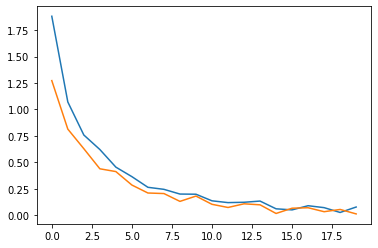

In [54]:
import matplotlib.pyplot as plt

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])

In [53]:
x_test[0].shape

(128, 128, 3)

In [55]:
classes = model.predict(x_test, batch_size=10,verbose=1)
len(classes)


794/794 [==============================] - 1s 1ms/step


794

In [0]:
y_test=classes

In [57]:
y_test=y_test.astype(int)
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [58]:
y_test.shape,y_train.shape


((794, 12), (4750, 12))

In [59]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [60]:
loss_and_metrics = model.evaluate(x_test, y_test)
print(loss_and_metrics)

794/794 [==============================] - 1s 936us/step
[2.0268585077312404e-08, 0.18891687661184173]


In [61]:
loss_and_metrics=model.evaluate(x_train,y_train)

4750/4750 [==============================] - 3s 647us/step


In [62]:
loss_and_metrics

[0.021773389744428353, 0.9951578947368421]

In [63]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


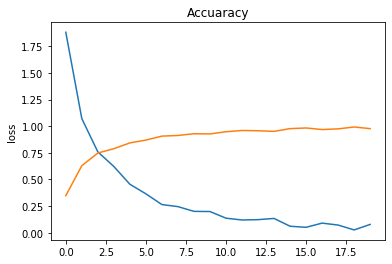

In [64]:

# summarize history for loss
plt.title('Loss vs Accuracy')
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.ylabel('loss')
plt.title('Accuaracy')
plt.show()